In [534]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
plt.style.use('ggplot')
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
from scipy.stats import norm

In [675]:
mu = 10
c = 2
std = np.sqrt(c * mu**2)
dist = norm(mu, std)

In [676]:
def calculate_L(data, mu, c):
    n = len(data)
    log_like = -n/2*np.log(mu**2) - 1/(2*c*mu**2) * np.sum((data-mu)**2)
    return log_like

def find_mle(samples, c):
    if np.sum(samples) < 0:
        num =  -np.sum(samples) - np.sqrt(np.sum(samples)**2 + 4 * len(samples) * c * np.sum(samples**2))
    else:
        num =  -np.sum(samples) + np.sqrt(np.sum(samples)**2 + 4 * len(samples) * c * np.sum(samples**2))
    den = 2 * len(samples) * c
    mle = num / den
    return mle

In [677]:
samples = norm(mu, std).rvs(10000)
find_mle(samples, c)

9.972854059235727

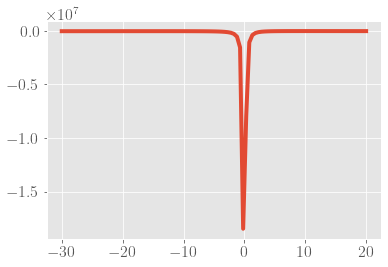

In [678]:
mus = np.linspace(-30, 20, 100)
l = [calculate_L(samples, mu, c) for mu in mus]
plt.plot(mus, l)

In [735]:
MLEs = []
for it in range(10000):
    samples = norm(mu, std).rvs(500000)
    MLEs.append(find_mle(samples, c))

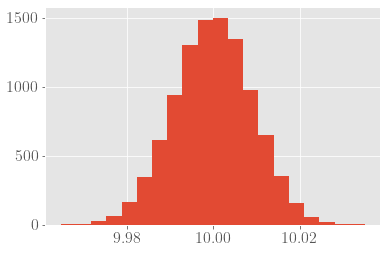

In [736]:
plt.hist(MLEs, bins=20);

In [737]:
np.std(MLEs, ddof=1)

0.00898825951375458

In [744]:
def calculate_se(samples, mle):
    n = len(samples)
    #info = (n/mle**2 - 1/(2*c) * (6*np.sum(samples**2)/mle**4 - 4 * np.sum(samples)/mle**3))
    info = -n/mle**2*(2+1/c)
    return np.sqrt(-1/info)

In [774]:
mu = 10
c = 2
std = np.sqrt(c * mu**2)
dist = norm(mu, std)
mle = find_mle(samples, c)
samples = dist.rvs(size=(5000, 1000))
samples_1 = samples.mean(axis=0) ** 2 / np.var(samples, ddof=1, axis=0,)

mu = 20
c = 2
std = np.sqrt(c * mu**2)
dist = norm(mu, std)
mle = find_mle(samples, c)
samples = dist.rvs(size=(5000, 1000))
samples_2 = samples.mean(axis=0) ** 2 / np.var(samples, ddof=1, axis=0)

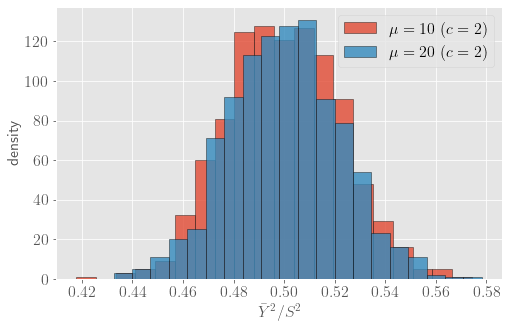

In [778]:
plt.figure(figsize=(8, 5))
plt.hist(samples_1, bins=20, edgecolor='black', alpha=.8, label='$\mu = 10$ $(c = 2)$')
plt.hist(samples_2, bins=20, edgecolor='black', alpha=.8, label='$\mu = 20$ $(c = 2)$')
plt.xlabel(r'$\bar{Y}^2/S^2$')
plt.ylabel('density')
plt.legend()
plt.savefig('../figures/no_dept.png', dpi=300, bbox_inches='tight');

-14.504504504504505
-14.94523272729619


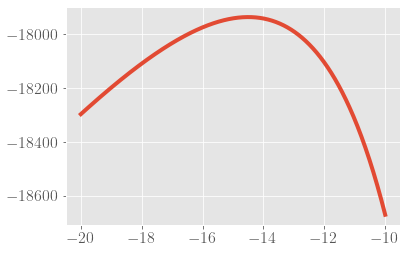

In [714]:
x = np.linspace(-10, -20, 1000)
like = [calculate_L(samples, mu, c) for mu in x]
plt.plot(x,like)
print(x[np.argmax(like)])
print(mle)

(array([  23.,  145.,  716., 1894., 2980., 2509., 1287.,  382.,   60.,
           4.]),
 array([-12.61312824,  -9.34541008,  -6.07769193,  -2.80997377,
          0.45774438,   3.72546254,   6.9931807 ,  10.26089885,
         13.52861701,  16.79633516,  20.06405332]),
 <BarContainer object of 10 artists>)

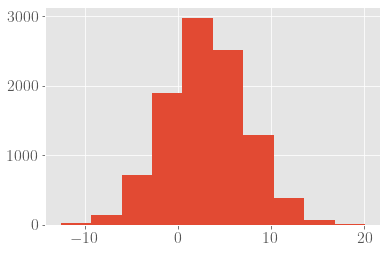

In [438]:
plt.hist(samples)

In [335]:
num =  np.sum(samples) - np.sqrt(np.sum(samples)**2 - 4 * len(samples) * c * np.sum(samples**2))
den = 2 * len(samples) * c
mle = num / den

In [336]:
mle

5.108125576259226

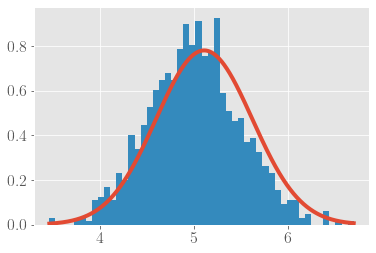

In [337]:
x = np.linspace(samples.min(), samples.max(), 1000)
plt.plot(x, norm(mle, np.sqrt(mle**2 * c)).pdf(x))
plt.hist(samples, density=True, bins=50);

In [338]:
np.sum(samples)**2 - 4 * len(samples) * c * np.sum(samples**2)

24079877.48769666

In [339]:
np.sum(samples)**2 - 4 * len(samples) * c * np.sum(samples**2)

24079877.48769666

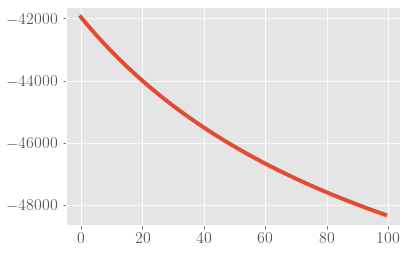

40.0

102.16251152518453